In [6]:
import numpy as np
import math
from qiskit import *
from qiskit.tools.visualization import plot_histogram

q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.cu1(math.pi/2.0, q[1], q[0]) # CROT_2 from q[1] to q[0]
circuit.cu1(math.pi/4.0, q[2], q[0]) # CROT_3 from q[2] to q[0]
circuit.h(q[1])
circuit.cu1(math.pi/2.0, q[2], q[1]) # CROT_2 from q[2] to q[1]
circuit.h(q[2])

#circuit.x(q[0])
#circuit.x(q[1])
#circuit.h([q[0],q[1]])
#circuit.h(q[1])
#circuit.ccx(q[0],q[1],q[2])
#circuit.h([q[0],q[1]])
#circuit.cy(q[2],q[3])
circuit.measure(q,c)

In [7]:
circuit.draw()

Result(backend_name='statevector_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 10, 23, 22, 29, 55, 611843), header=Obj(backend_name='statevector_simulator', backend_version='0.3.2'), job_id='8d1a0aa6-5afa-4ec7-9fd6-0e85a7c6874a', metadata={'max_memory_mb': 4033, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0132094}, qobj_id='24ba0b3c-9343-42d8-bab8-57fda45f3f7c', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x1=1), statevector=[0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j]), header=Obj(clbit_labels=[['c2', 0], ['c2', 1], ['c2', 2]], creg_sizes=[['c2', 3]], memory_slots=3, n_qubits=3, name='circuit4', qreg_sizes=[['q2', 3]], qubit_labels=[['q2', 0], ['q2', 1], ['q2', 2]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=2792708346, shots=1, status='DONE', success=True, time_taken=0.0001529)], status='COMPLETED', success=True, time_taken=0.031356096267700195)

Total count are: {'111': 118, '100': 139,

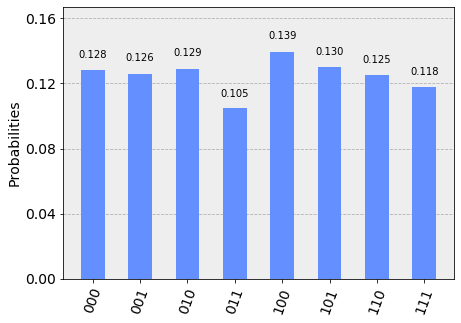

In [8]:
simulator = Aer.get_backend('qasm_simulator')
backend = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator, shots=1000)
job1 = execute(circuit, backend, shots=1000)

result = job.result()
result1 = job1.result()

print(result1)
counts = result.get_counts(circuit)
print("\nTotal count are:",counts)
plot_histogram(counts)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


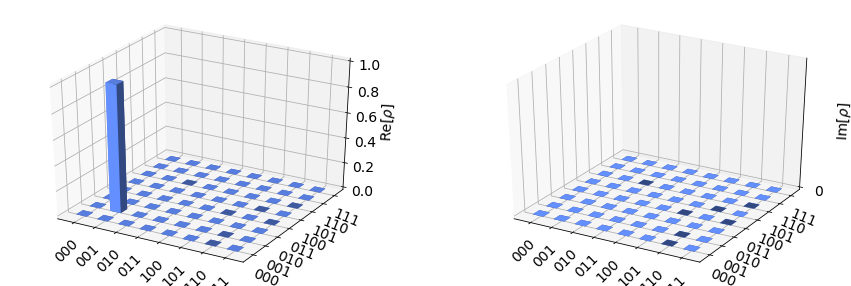

In [9]:
outputstate = result1.get_statevector(circuit, decimals=3)
print(outputstate)
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)